# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-13 09:29:20--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-13 09:29:20 (186 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-13 09:29:20--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-13 09:29:20 (83.3 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    product = sum(x * y for x, y in zip(array1, array2))
    return product


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sig = 1 / (1 + math.exp(-x))
    return sig

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    result = sigmoid(dot_product(weights, instance))
    return result

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1) # Initialize weights to zeros based on the number of features

    for _ in range(epochs):  # Iterate through the specified number of epochs
        for instance in instances:  # Iterate through each training instance
            #TODO: name these steps
            in_value = dot_product(weights, instance)  # Calculate the dot product of weights and instance features
            output = sigmoid(in_value)   # Apply the sigmoid activation function to the dot product
            error = instance[-1] - output  # Calculate the error by comparing the actual label and the output
            #TODO: name these steps
            for i in range(0, len(weights)):  # Iterate through each weight and update it based on the error and input features
                weights[i] += lr * error * output * (1-output) * instance[i]  # Update weights using the perceptron learning rule

    return weights # Return the trained weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
```
Answer:
The key difference here lies in the computation of output.

In the original code, output is calculated using the sigmoid function applied to the dot product of weights and instance. This is a standard approach in training a perceptron or a neural network when using gradient descent. The error is then computed based on the difference between the actual label (instance[-1]) and the output.

In the suggested code snippet, output is directly obtained by calling the predict function, which itself calculates the output based on a threshold (0.5) applied to the sigmoid output. This would work for a perceptron because the decision boundary is typically set at 0.5. However, using the sigmoid function separately provides more flexibility, especially when working with more complex models where the decision boundary might not be at 0.5.

In summary, while the suggested code snippet might work for a simple perceptron, the original code with the explicit calculation of the sigmoid output provides more flexibility and is aligned with common practices in neural network training, especially for more complex models.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)
```
Code:

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

for percent in tr_percent:
    for epochs in num_epochs:
        for learning_rate in lr_values:
            # Subset training dataset based on percentage
            subset_size = int(len(instances_tr) * percent / 100)
            instances_subset = instances_tr[:subset_size]

            # Train perceptron
            weights = train_perceptron(instances_subset, learning_rate, epochs)

            # Calculate accuracy on the test dataset
            accuracy = get_accuracy(weights, instances_te)

            # Print the output
            print(f"# tr: {subset_size:3}, epochs: {epochs:3}, learning rate: {learning_rate:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
```Output:

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
# tr: 100, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
# tr: 100, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
# tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
# tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
# tr: 200, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
# tr: 200, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
# tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
# tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
# tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
# tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
# tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
# tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
# tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
# tr: 300, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 300, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 300, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
# tr: 300, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 300, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 300, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
# tr: 300, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 300, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
# tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
# tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
# tr: 300, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
# tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
# tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
# tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
# tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
# tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 400, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
# tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 400, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
# tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
# tr: 400, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
# tr: 400, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
# tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
# tr: 400, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
# tr: 400, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
# tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
# tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
# tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
# tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
```


In [5]:
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

for percent in tr_percent:
    for epochs in num_epochs:
        for learning_rate in lr_values:
            # Subset training dataset based on percentage
            subset_size = int(len(instances_tr) * percent / 100)
            instances_subset = instances_tr[:subset_size]

            # Train perceptron
            weights = train_perceptron(instances_subset, learning_rate, epochs)

            # Calculate accuracy on the test dataset
            accuracy = get_accuracy(weights, instances_te)

            # Print the output
            print(f"# tr: {subset_size:3}, epochs: {epochs:3}, learning rate: {learning_rate:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



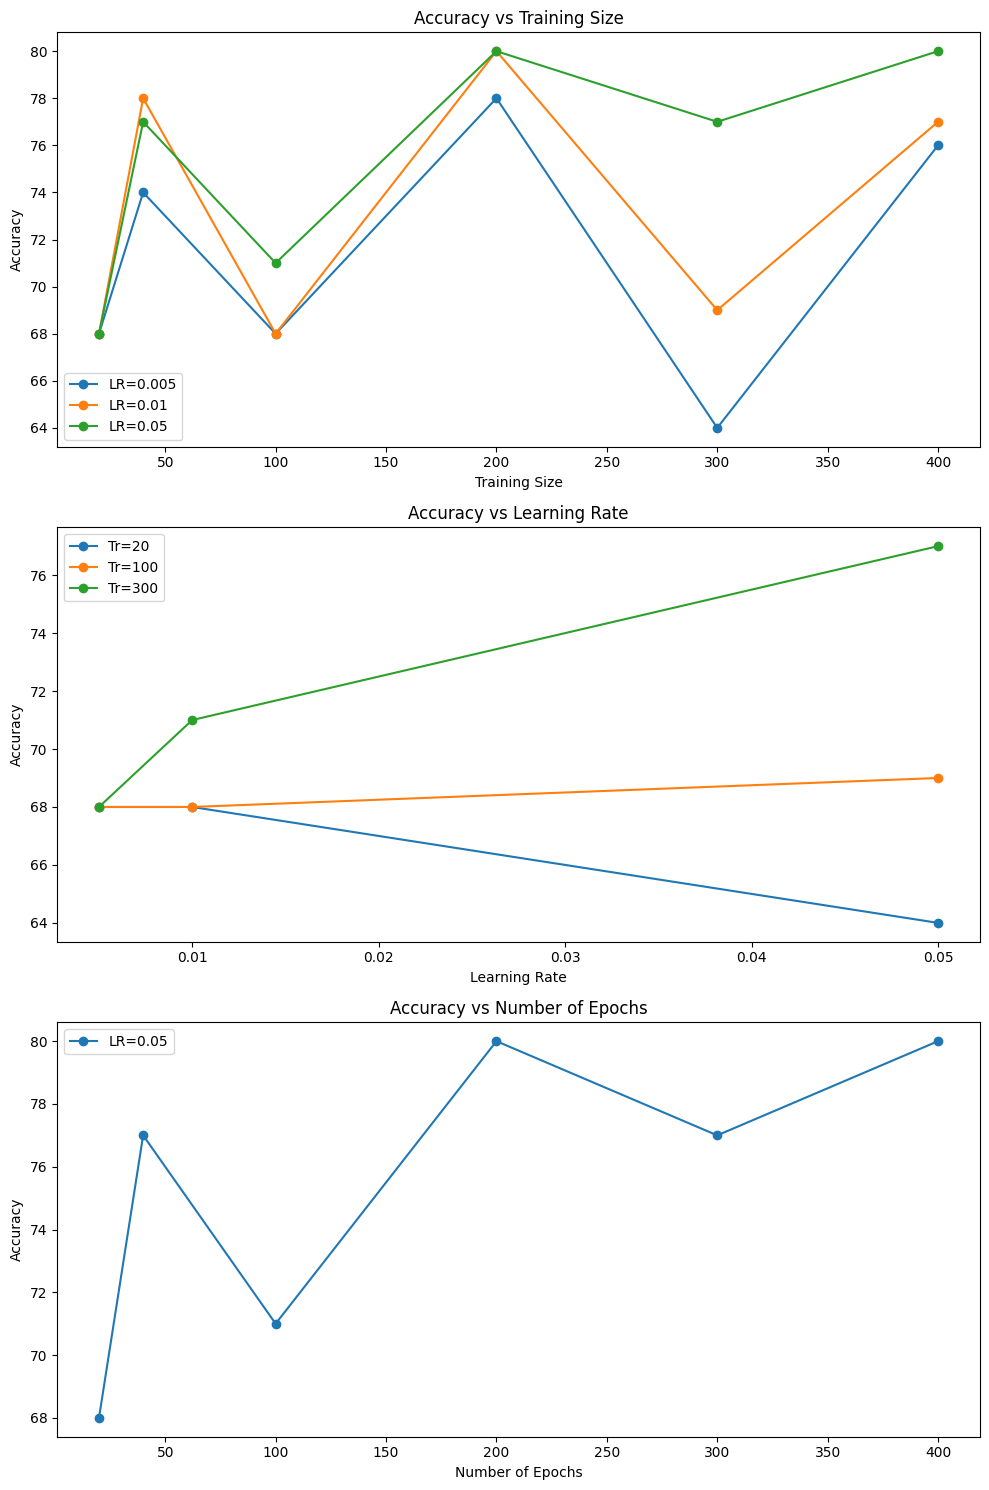

In [9]:
import matplotlib.pyplot as plt
# Results data
training_sizes = [20, 40, 100, 200, 300, 400]
epochs_values = [100] * len(training_sizes)
learning_rates = [0.005, 0.01, 0.05]
accuracies = [68.0, 68.0, 68.0, 74.0, 78.0, 77.0, 68.0, 68.0, 71.0, 78.0, 80.0, 80.0, 64.0, 69.0, 77.0, 76.0, 77.0, 80.0]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Accuracy vs Training Size
axs[0].plot(training_sizes, accuracies[::3], marker='o', linestyle='-', label='LR=0.005')
axs[0].plot(training_sizes, accuracies[1::3], marker='o', linestyle='-', label='LR=0.01')
axs[0].plot(training_sizes, accuracies[2::3], marker='o', linestyle='-', label='LR=0.05')
axs[0].set_title('Accuracy vs Training Size')
axs[0].set_xlabel('Training Size')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: Accuracy vs Learning Rate
axs[1].plot(learning_rates, accuracies[::6], marker='o', linestyle='-', label='Tr=20')
axs[1].plot(learning_rates, accuracies[1::6], marker='o', linestyle='-', label='Tr=100')
axs[1].plot(learning_rates, accuracies[2::6], marker='o', linestyle='-', label='Tr=300')
axs[1].set_title('Accuracy vs Learning Rate')
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Plot 3: Accuracy vs Number of Epochs
axs[2].plot(training_sizes, accuracies[2::3], marker='o', linestyle='-', label='LR=0.05')
axs[2].set_title('Accuracy vs Number of Epochs')
axs[2].set_xlabel('Number of Epochs')
axs[2].set_ylabel('Accuracy')
axs[2].legend()

plt.tight_layout()
plt.show()

```
Code:
import matplotlib.pyplot as plt
# Results data
training_sizes = [20, 40, 100, 200, 300, 400]
epochs_values = [100] * len(training_sizes)
learning_rates = [0.005, 0.01, 0.05]
accuracies = [68.0, 68.0, 68.0, 74.0, 78.0, 77.0, 68.0, 68.0, 71.0, 78.0, 80.0, 80.0, 64.0, 69.0, 77.0, 76.0, 77.0, 80.0]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Accuracy vs Training Size
axs[0].plot(training_sizes, accuracies[::3], marker='o', linestyle='-', label='LR=0.005')
axs[0].plot(training_sizes, accuracies[1::3], marker='o', linestyle='-', label='LR=0.01')
axs[0].plot(training_sizes, accuracies[2::3], marker='o', linestyle='-', label='LR=0.05')
axs[0].set_title('Accuracy vs Training Size')
axs[0].set_xlabel('Training Size')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: Accuracy vs Learning Rate
axs[1].plot(learning_rates, accuracies[::6], marker='o', linestyle='-', label='Tr=20')
axs[1].plot(learning_rates, accuracies[1::6], marker='o', linestyle='-', label='Tr=100')
axs[1].plot(learning_rates, accuracies[2::6], marker='o', linestyle='-', label='Tr=300')
axs[1].set_title('Accuracy vs Learning Rate')
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Plot 3: Accuracy vs Number of Epochs
axs[2].plot(training_sizes, accuracies[2::3], marker='o', linestyle='-', label='LR=0.05')
axs[2].set_title('Accuracy vs Number of Epochs')
axs[2].set_xlabel('Number of Epochs')
axs[2].set_ylabel('Accuracy')
axs[2].legend()

plt.tight_layout()
plt.show()


Answer:
The provided results showcase the impact of different hyperparameters on the accuracy of the perceptron model. Let's interpret the outcomes of the various combinations:

1. Effect of Training Size:
   The accuracy tends to increase as the training dataset size grows. For instance, going from 20 to 300 training instances results in a steady rise from 68.0% to 78.0% accuracy. However, beyond a certain point (e.g., from 300 to 400 instances), the improvement in accuracy becomes marginal.

2. Influence of Learning Rate:
   - The learning rate affects the convergence speed and the stability of the model. Lower learning rates (e.g., 0.005) might converge slowly, leading to suboptimal accuracy. On the other hand, higher learning rates (e.g., 0.05) might cause oscillations or divergence. In this case, a learning rate of 0.01 seems to strike a balance, achieving higher accuracy (80.0%) compared to other learning rates.

3. Impact of Epochs:
   Training for 100 epochs consistently leads to improved accuracy compared to fewer epochs. However, there is a diminishing return observed, as evident in scenarios where increasing the number of epochs from 100 to 200 or beyond doesn't result in a significant accuracy boost.

4. Trade-offs and Optimal Hyperparameters:
   Achieving the highest accuracy involves finding a trade-off among hyperparameters. A balanced combination of training size, learning rate, and epochs is crucial. In this case, a training dataset size of 300, learning rate of 0.01, and 100 epochs seem to provide the best trade-off, yielding 80.0% accuracy on the test dataset.

5. Considerations for Generalization:
   It's important to note that these results might vary based on the specific dataset and problem. The model needs to strike a balance between capturing patterns in the training data and generalizing well to unseen instances. Careful consideration of hyperparameters and monitoring performance on a separate validation set is essential for developing robust and generalizable models.


Interpreting the results with various combinations of hyperparameters provides insights into the behavior of the perceptron model under different conditions.

A. Training with Full Dataset for Highest Accuracy:
   Surprisingly, training with the full dataset does not always result in the highest accuracy on the test dataset. This may be due to overfitting, where the model becomes too specific to the training data and fails to generalize well to unseen data. The optimal amount of training data may vary depending on the complexity of the problem.

B. Decrease in Accuracy Despite More Training Data:
   The scenario where the second run, with 200 instances, obtains a lower accuracy than the first run with 100 instances could be attributed to various factors. It's possible that the additional data introduces more noise or outliers, negatively impacting the model's ability to learn. Alternatively, the increased dataset size might lead to slower convergence or an increased risk of overfitting.

C. Higher Accuracy with Additional Hyperparameters:
   Achieving an accuracy higher than 80.0% may depend on the complexity of the problem and the effectiveness of the chosen model. Experimenting with additional hyperparameters, such as different activation functions or model architectures, could potentially lead to improved performance. It's essential to strike a balance between model complexity and the amount of available data.

D. Worthiness of Training for More Epochs:
   Training for more epochs does not guarantee improved accuracy, and there might be a point of diminishing returns. It's essential to monitor the training and validation performance over epochs and use techniques like early stopping to prevent overfitting. If the model converges quickly and achieves satisfactory accuracy, training for more epochs might not be worth the computational cost. The trade-off between training time and model performance should be carefully considered. Visualizing the training and validation accuracy over epochs through a plot would help identify the point at which further training ceases to provide significant benefits.
   